In [10]:
import pandas as pd
import matplotlib.pyplot as plt

### Se carga la  Encuesta Mensual de Comercio (EMC) minorista desarrollada por el DANE, la cual proporciona los principales indicadores sobre la evolución de la actividad comercial del país, por medio de resultados del comercio al por menor y de vehículos, al generar información sobre variables como ventas, personal ocupado y sueldos y salarios. 

### Esta encuesta a nivel de microdato recoge la información de 400 variables para 2301 empresas. La EMC viene del periodo de enero de 2019 a septiembre de 2023, y para objeto de analisis se toma la información de las variables que recogen las ventas reales por linea de mercancia a nivel nacional, así como de las ventas reales por actividad económica para realizar el analisis regional. 

In [11]:
base_min = pd.read_csv("BD_EMC_MIN_23.csv", sep=";")

C:\Users\nicol\AppData\Local\Temp\ipykernel_24732\287592984.py:1: DtypeWarning: Columns (0,8,130,137,143,150,157,164,171,227,228,229,231,232,234,235,236,237,240,241,242,243,244,245,246,247,249,371,372,373,374,375,376,380,395,396,397,398) have mixed types. Specify dtype option on import or set low_memory=False.
  base_min = pd.read_csv("BD_EMC_MIN_23.csv", sep=";")


In [12]:
base_min.fillna(0, inplace=True)

In [13]:
base_min.head()

,LLAVE,NORDEN,ANIO,MES,COD_ACT,CORRELA,NOMBRE_COMERCIAL,SEDE,FACTOR,ESTAB_MES_ANT,...,PERSONAL_OTROS_E_AJ,PERSONAL_DEPTOS_E_AJ,Rel_Costo,Costo_E,Relación_INV,INV_E,SUELDOS_E_PPERMAN,SUELDOS_E_PTEMP_DIRECTO,Total,Total_personal_E
0,88888820191,888888,2019,1,4731,4731,MEZCLADORAS INDUSTRIA,Medellin,1,1.0,...,0,0,0,0,0,0,0,0,0,0
1,88888820192,888888,2019,2,4731,4731,MEZCLADORAS INDUSTRIA,Medellin,1,1.0,...,0,0,0,0,0,0,0,0,0,0
2,88888820193,888888,2019,3,4731,4731,MEZCLADORAS INDUSTRIA,Medellin,1,1.0,...,0,0,0,0,0,0,0,0,0,0
3,88888820194,888888,2019,4,4731,4731,MEZCLADORAS INDUSTRIA,Medellin,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,88888820195,888888,2019,5,4731,4731,MEZCLADORAS INDUSTRIA,Medellin,1,1.0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
print(base_min.columns)

Index(['LLAVE', 'NORDEN', 'ANIO', 'MES', 'COD_ACT', 'CORRELA',
       'NOMBRE_COMERCIAL', 'SEDE', 'FACTOR', 'ESTAB_MES_ANT',
       ...
       'Costo_E', 'Relación_INV', 'INV_E', 'SUELDOS_E_PPERMAN',
       'SUELDOS_E_PTEMP_DIRECTO', 'Total', 'Total_personal_E', 'fecha',
       'Trimestre', 'Nombre_COD_ACT'],
      dtype='object', length=403)


In [14]:
# Definir un diccionario de mapeo para cambiar los nombres de las columnas de interes, con el fin de asignarle el nombre de la linea de mercancia asociada
nombres_columnas = {
    'ALIMENTOS_SIN_BEB2': "Alimentos",
    'BEBIDAS_ED': 'Bebidas no alcohólicas',
    'LICORES_ED': 'Bebidas alcohólicas y tabaco',
    'PREN_VESTIR_ED': 'Prendas de vestir',
    'CALZADO_ED': 'Calzado',
    'FARMACIA_ED': 'Productos farmacéuticos',
    'ASEO_PERS_ED': 'Productos aseo personal',
    'ELECTRODOM_ED': 'Electrodomésticos y muebles',
    'ARTI_UTENSI_ED': 'Utensilios uso doméstico',
    'ASEO_HOGAR_ED': 'Productos aseo del hogar',
    'INFORMATICA_ED': 'Equipo de informática y telecom',
    'TV_SON_ED': 'Equipo y aparatos de sonido y video',
    'LIBROS_ED': 'Libros',
    'FERRETERIA_ED': 'Artículos de ferretería',
    'OTRAS_MERC_ED': 'Otras mercancías',
    'REPUESTOS_ED': 'Repuestos, partes, y lubricantes para vehículos',
    'COMBUSTIBLES_ED': 'Combustibles',
    'VEHICULOS_HOG_ED': 'Vehículos automotores y motocicletas',
    'VEHICULOS_OTROS_ED': 'Otros vehículos automotores y motocicletas',
    'TOTAL_LINEAS_ED': 'Total comercio minorista',
    ' VENTAS_ANT_E_AJ_D ': 'Antioquia',
    'VENTAS_ATL_E_AJ_D': 'Atlántico',
    'VENTAS_BOG_DPTO_E_AJ_D': 'Bogotá',
    'VENTAS_CUN_E_AJ_D': 'Cundinamarca',
    'VENTAS_SANT_E_AJ_D': 'Santander',
    'VENTAS_VALLE_E_AJ_D': 'Valle del Cauca',
    'VENTAS_OTROS_E_AJ_D': 'Otros departamentos',
    'TOTAL_DEPTOS_E_AJ_D': 'Total Nacional'}

# Renombrar las columnas en la base_min
base_min.rename(columns=nombres_columnas, inplace=True)

In [15]:
# con el fin de manipular la base, se convierte las columnas 'ANIO' y 'MES' de base_min a tipo string (str)
base_min['ANIO'] = base_min['ANIO'].astype(str)
base_min['MES'] = base_min['MES'].astype(str)

# Combina 'ANIO' y 'MES' y convierte a formato datetime
base_min['fecha'] = pd.to_datetime(base_min['ANIO'] + base_min['MES'], format='%Y%m', errors='coerce')

# Muestra el DataFrame con la nueva columna 'fecha'
base_min.tail()

,LLAVE,NORDEN,ANIO,MES,COD_ACT,CORRELA,NOMBRE_COMERCIAL,SEDE,FACTOR,ESTAB_MES_ANT,...,PERSONAL_DEPTOS_E_AJ,Rel_Costo,Costo_E,Relación_INV,INV_E,SUELDOS_E_PPERMAN,SUELDOS_E_PTEMP_DIRECTO,Total,Total_personal_E,fecha
104673,90421420235,904214,2023,5,4530,4530,FALCON AUTOMOTRIZ S.A.S.,Medellin,1,2.0,...,0,"0,47408",0,"1,472531945",0,0,0,0,0,2023-05-01
104674,90421420236,904214,2023,6,4530,4530,FALCON AUTOMOTRIZ S.A.S.,Medellin,1,2.0,...,0,"0,46418",0,"1,006220527",0,0,0,0,0,2023-06-01
104675,90421420237,904214,2023,7,4530,4530,FALCON AUTOMOTRIZ S.A.S.,Medellin,1,2.0,...,0,"0,44005",0,"1,075480371",0,0,0,0,0,2023-07-01
104676,90421420238,904214,2023,8,4530,4530,FALCON AUTOMOTRIZ S.A.S.,Medellin,1,2.0,...,0,"0,44429",0,"0,985104478",0,0,0,0,0,2023-08-01
104677,90421420239,904214,2023,9,4530,4530,FALCON AUTOMOTRIZ S.A.S.,Medellin,1,2.0,...,0,"0,45261",0,"1,16177901",0,0,0,0,0,2023-09-01


In [215]:
base_min['fecha'] = pd.to_datetime(base_min['fecha'])
base_min['Trimestre'] = base_min['fecha'].dt.to_period("Q")

In [17]:
# Agrupa por mes y suma los valores para cada categoría
ventas_reales_mes = pd.pivot_table(base_min, 
                                values=['Alimentos', 'Bebidas no alcohólicas', 'Bebidas alcohólicas y tabaco',
                             'Prendas de vestir', 'Calzado', 'Productos farmacéuticos',
                             'Productos aseo personal',
                             'Electrodomésticos y muebles',
                             'Utensilios uso doméstico', 'Productos aseo del hogar',
                             'Equipo de informática y telecom', 'Equipo y aparatos de sonido y video',
                             'Libros', 'Artículos de ferretería', 'Otras mercancías',
                             'Repuestos, partes, y lubricantes para vehículos', 'Combustibles',
                             'Vehículos automotores y motocicletas',
                             'Otros vehículos automotores y motocicletas',
                             'Total comercio minorista'],
                                index=base_min['fecha'].dt.to_period("M"),
                                  aggfunc="sum")
ventas_reales_mes

,Alimentos,Artículos de ferretería,Bebidas alcohólicas y tabaco,Bebidas no alcohólicas,Calzado,Combustibles,Electrodomésticos y muebles,Equipo de informática y telecom,Equipo y aparatos de sonido y video,Libros,Otras mercancías,Otros vehículos automotores y motocicletas,Prendas de vestir,Productos aseo del hogar,Productos aseo personal,Productos farmacéuticos,"Repuestos, partes, y lubricantes para vehículos",Total comercio minorista,Utensilios uso doméstico,Vehículos automotores y motocicletas
fecha,,,,,,,,,,,,,,,,,,,,
2019-01,2379312452,390803318,213241320,137199034,200175137,2441967706,364897061,290383794,153541385,195196153,353476216,618337472,501668115,282568148,461995346,310503189,849169466,11366464745,156433674,1007235636
2019-02,2286174603,386379468,186926370,131105553,163268603,2287958907,341616319,316334973,175625130,126292357,326231849,815665382,418414888,264411885,440477563,282164130,799128020,10998153439,141255114,1053995308
2019-03,2611682555,417619465,210661094,148025744,187378728,2408321135,388963428,354545108,208365173,73987234,360212726,943949043,494737145,296289025,499434906,324490270,805699527,12079378865,161676290,1123819929
2019-04,2457063198,388705980,194607021,136531707,174866813,2446065941,346898608,305955232,178164957,63704895,353746929,949726048,461019641,270417748,444867585,307901357,809027765,11566870053,139345563,1078499162
2019-05,2531066931,409989862,198791834,138743154,207967477,2556603997,396451367,349570473,213400444,70476362,379949800,947982632,554372592,284875125,489684704,317663086,871352500,12337065566,145632189,1193604797
2019-06,2525094312,388112881,254246077,143251596,223966135,2447198188,393674505,338090342,250742947,57307305,382900178,974582249,645554676,295063144,508520504,325602772,784361433,12202144255,151011348,1041072840
2019-07,2584061098,431194767,214548831,146776894,213680264,2591558336,418002908,348910601,215370611,74123109,377827637,1023458755,592344298,301624279,502638512,334038591,872935090,12715143475,167686702,1231239754
2019-08,2609935187,434458600,235955708,154404008,209639634,2667771787,445279058,408295685,232874611,84871885,398951008,1140479037,560006238,300433008,494708503,326062672,858964419,13083145933,170280961,1266847935
2019-09,2537293516,422048038,215930154,150287352,219332432,2535909908,391762008,343366916,210256537,68237091,382084947,1037096143,564468951,293863493,492005673,306525818,848793851,12475731769,157783578,1216223175


### A continuación, se realiza el cálculo del total de ventas reales por linea de mercancia y el total del comercio minorista, agrupando por trimestre con el fin de acotar el analisís

In [164]:
# Agrupa por trimestre y suma los valores para cada categoría
ventas_reales_trim = pd.pivot_table(base_min, 
                               values=['Alimentos', 'Bebidas no alcohólicas', 'Bebidas alcohólicas y tabaco',
                             'Prendas de vestir', 'Calzado', 'Productos farmacéuticos',
                             'Productos aseo personal',
                             'Electrodomésticos y muebles',
                             'Utensilios uso doméstico', 'Productos aseo del hogar',
                             'Equipo de informática y telecom', 'Equipo y aparatos de sonido y video',
                             'Libros', 'Artículos de ferretería', 'Otras mercancías',
                             'Repuestos, partes, y lubricantes para vehículos', 'Combustibles',
                             'Vehículos automotores y motocicletas',
                             'Total comercio minorista'],
                                index=base_min['Trimestre'],
                                  aggfunc="sum")
                            
ventas_reales_trim

,Alimentos,Artículos de ferretería,Bebidas alcohólicas y tabaco,Bebidas no alcohólicas,Calzado,Combustibles,Electrodomésticos y muebles,Equipo de informática y telecom,Equipo y aparatos de sonido y video,Libros,Otras mercancías,Prendas de vestir,Productos aseo del hogar,Productos aseo personal,Productos farmacéuticos,"Repuestos, partes, y lubricantes para vehículos",Total comercio minorista,Utensilios uso doméstico,Vehículos automotores y motocicletas
Trimestre,,,,,,,,,,,,,,,,,,,
2019Q1,7277169610,1194802251,610828784,416330331,550822468,7138247748,1095476808,961263875,537531688,395475744,1039920791,1414820148,843269058,1401907815,917157589,2453997013,34443997049,459365078,3185050873
2019Q2,7513224441,1186808723,647644932,418526457,606800425,7449868126,1137024480,993616047,642308348,191488562,1116596907,1660946909,850356017,1443072793,951167215,2464741698,36106079874,435989100,3313176799
2019Q3,7731289801,1287701405,666434693,451468254,642652330,7795240031,1255043974,1100573202,658501759,227232085,1158863592,1716819487,895920780,1489352688,966627081,2580693360,38274021177,495751241,3714310864
2019Q4,8090184372,1378394224,1111049930,459650154,1049813155,7922377969,1337159575,1461478313,840457652,232866832,1653995779,3050467220,927745681,1587818668,959802162,2575619517,42930261546,622401063,4037086425
2020Q1,8516819140,1150957272,607130560,469328978,503422283,7064741215,1149150666,1113723499,592938617,395803054,1033026476,1300158697,1017091556,1573953685,980117134,2353506481,36224221868,444709731,3076487904
2020Q2,8101778354,698975527,574185990,349093153,142816724,4655432793,1020524221,1241505809,615613090,109108861,796961899,516716174,975883371,1245244565,827298148,1329078320,26150358598,340469569,1283858252
2020Q3,7643484673,1274717984,668203201,346778870,359699230,6622559773,1426666797,1622508827,784339687,172879867,1022405458,1125822872,1085968205,1351489194,956314061,2171687018,34407896188,485592997,2821636015
2020Q4,8349597477,1530503217,1206318156,425513565,891953752,7821937810,1661555956,1828456195,1054834317,206635581,1592681098,2841461960,1186551812,1577340364,1022742694,2524203071,43651451555,668421848,3989162323
2021Q1,7799918154,1475927944,660532587,402092653,433166902,7572424641,1389153846,1687062785,640592315,267967973,1116486334,1333836252,1162416409,1463252832,980777473,2501600524,38003414591,508795577,3665920595


### Dado que las ventas reales están expresadas en miles de millones de pesos, se convierten en indice base 2019 con el fin de realizar un análisis comparativo más efectivo entre diferentes líneas de productos a lo largo del tiempo. Al utilizar un índice base, se elimina la magnitud absoluta de las cifras y se resalta la variación porcentual con respecto a un período específico (en este caso, 2019).  Una valor de menos de 100 indica una reducción en las ventas, mientras que un valor superior a 100 indicaría un aumento en comparación con el nivel observado en 2019

In [165]:
# 1. Calcular el Promedio por Columna para el Año 2019
promedio_2019 = ventas_reales_trim.loc['2019-Q1':'2019-Q4'].mean()

# 2. Dividir cada Valor por el promedio correspondiente
ventas_reales_trim_base2019 = ventas_reales_trim.copy()
for columna in ventas_reales_trim.columns:
    ventas_reales_trim_base2019[columna] = ventas_reales_trim_base2019[columna] / promedio_2019[columna]*100

# Mostrar el nuevo DataFrame
ventas_reales_trim_base2019

,Alimentos,Artículos de ferretería,Bebidas alcohólicas y tabaco,Bebidas no alcohólicas,Calzado,Combustibles,Electrodomésticos y muebles,Equipo de informática y telecom,Equipo y aparatos de sonido y video,Libros,Otras mercancías,Prendas de vestir,Productos aseo del hogar,Productos aseo personal,Productos farmacéuticos,"Repuestos, partes, y lubricantes para vehículos",Total comercio minorista,Utensilios uso doméstico,Vehículos automotores y motocicletas
Trimestre,,,,,,,,,,,,,,,,,,,
2019Q1,95.089520,94.680800,80.479205,95.380583,77.306019,94.216464,90.822286,85.125390,80.264566,151.079987,83.706330,72.156596,95.899819,94.689081,96.676367,97.428663,90.788817,91.256737,89.407290
2019Q2,98.174007,94.047362,85.329884,95.883712,85.162331,98.329487,94.266863,87.990359,95.909882,73.152626,89.878219,84.709194,96.705776,97.469488,100.261277,97.855249,95.169799,86.612902,93.003902
2019Q3,101.023430,102.042492,87.805512,103.430623,90.194021,102.887989,104.051462,97.462024,98.327892,86.807398,93.280391,87.558726,101.887577,100.595371,101.890881,102.458765,100.884143,98.485154,104.264102
2019Q4,105.713043,109.229346,146.385399,105.305082,147.337628,104.566060,110.859389,129.422227,125.497659,88.959989,133.135059,155.575484,105.506828,107.246060,101.171475,102.257323,113.157241,123.645207,113.324707
2020Q1,111.287806,91.206353,79.991949,107.522485,70.653568,93.246265,95.272205,98.626558,88.537963,151.205026,83.151386,66.308799,115.667586,106.309578,103.312849,93.438985,95.481203,88.345329,86.359828
2020Q2,105.864540,55.389553,75.651366,79.976658,20.043831,61.446231,84.608220,109.942409,91.923730,41.681862,64.149843,26.352805,110.981232,84.107573,87.204402,52.767107,68.928125,67.637144,36.039075
2020Q3,99.876095,101.013635,88.038520,79.446460,50.482537,87.409990,118.280131,143.682396,117.118090,66.043717,82.296468,57.417578,123.500505,91.283655,100.803799,86.220383,90.693661,96.467134,79.205903
2020Q4,109.102750,121.283057,158.937379,97.484447,125.182610,103.240368,137.753998,161.920208,157.508516,78.939104,128.199658,144.916103,134.939262,106.538324,107.805953,100.215986,115.058181,132.787623,111.979433
2021Q1,101.920185,116.958299,87.027886,92.118755,60.793469,99.947088,115.170059,149.399016,95.653643,102.369357,89.869319,68.026373,132.194491,98.832508,103.382455,99.318619,100.170867,101.076521,102.905743


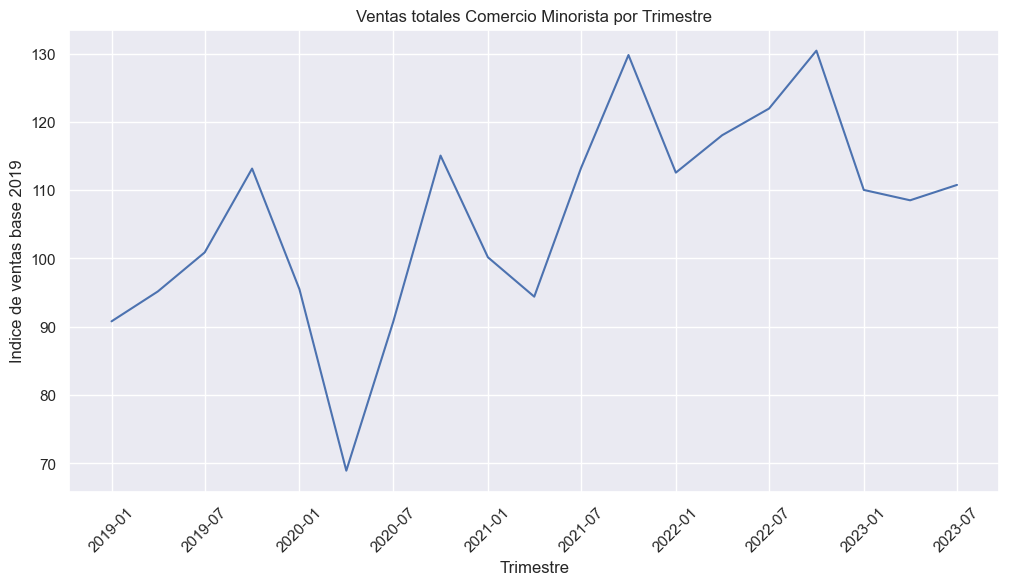

In [241]:
ventas_reales_trim2=ventas_reales_trim_base2019.reset_index()
ventas_reales_trim2['Trimestre'] = ventas_reales_trim2['Trimestre'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Trimestre', y='Total comercio minorista', data=ventas_reales_trim2)

plt.xlabel('Trimestre')
plt.ylabel('Indice de ventas base 2019')
plt.title('Ventas totales Comercio Minorista por Trimestre')

# Ajustar el formato de las fechas en el eje x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

plt.show()

In [191]:
ventas_reales_trim2

,Trimestre,Alimentos,Artículos de ferretería,Bebidas alcohólicas y tabaco,Bebidas no alcohólicas,Calzado,Combustibles,Electrodomésticos y muebles,Equipo de informática y telecom,Equipo y aparatos de sonido y video,Libros,Otras mercancías,Prendas de vestir,Productos aseo del hogar,Productos aseo personal,Productos farmacéuticos,"Repuestos, partes, y lubricantes para vehículos",Total comercio minorista,Utensilios uso doméstico,Vehículos automotores y motocicletas
0,2019-01-01,95.089520,94.680800,80.479205,95.380583,77.306019,94.216464,90.822286,85.125390,80.264566,151.079987,83.706330,72.156596,95.899819,94.689081,96.676367,97.428663,90.788817,91.256737,89.407290
1,2019-04-01,98.174007,94.047362,85.329884,95.883712,85.162331,98.329487,94.266863,87.990359,95.909882,73.152626,89.878219,84.709194,96.705776,97.469488,100.261277,97.855249,95.169799,86.612902,93.003902
2,2019-07-01,101.023430,102.042492,87.805512,103.430623,90.194021,102.887989,104.051462,97.462024,98.327892,86.807398,93.280391,87.558726,101.887577,100.595371,101.890881,102.458765,100.884143,98.485154,104.264102
3,2019-10-01,105.713043,109.229346,146.385399,105.305082,147.337628,104.566060,110.859389,129.422227,125.497659,88.959989,133.135059,155.575484,105.506828,107.246060,101.171475,102.257323,113.157241,123.645207,113.324707
4,2020-01-01,111.287806,91.206353,79.991949,107.522485,70.653568,93.246265,95.272205,98.626558,88.537963,151.205026,83.151386,66.308799,115.667586,106.309578,103.312849,93.438985,95.481203,88.345329,86.359828
5,2020-04-01,105.864540,55.389553,75.651366,79.976658,20.043831,61.446231,84.608220,109.942409,91.923730,41.681862,64.149843,26.352805,110.981232,84.107573,87.204402,52.767107,68.928125,67.637144,36.039075
6,2020-07-01,99.876095,101.013635,88.038520,79.446460,50.482537,87.409990,118.280131,143.682396,117.118090,66.043717,82.296468,57.417578,123.500505,91.283655,100.803799,86.220383,90.693661,96.467134,79.205903
7,2020-10-01,109.102750,121.283057,158.937379,97.484447,125.182610,103.240368,137.753998,161.920208,157.508516,78.939104,128.199658,144.916103,134.939262,106.538324,107.805953,100.215986,115.058181,132.787623,111.979433
8,2021-01-01,101.920185,116.958299,87.027886,92.118755,60.793469,99.947088,115.170059,149.399016,95.653643,102.369357,89.869319,68.026373,132.194491,98.832508,103.382455,99.318619,100.170867,101.076521,102.905743
9,2021-04-01,97.811429,104.548009,89.537111,90.680256,67.687375,87.608684,104.438349,123.252282,89.025165,58.614296,88.203576,72.553670,128.465888,95.071893,108.604300,88.261141,94.403048,90.610075,99.081744


### Se calculan las variaciones anuales por linea de mercancia incluyendo el total nacional 

In [150]:
# Calcular las variaciones anuales
variaciones_anuales = ventas_reales_trim_base2019.pct_change(periods=4) * 100

# Mostrar el dataframe de variaciones anuales
variaciones_anuales = variaciones_anuales['2020Q1':]
variaciones_anuales

,Alimentos,Artículos de ferretería,Bebidas alcohólicas y tabaco,Bebidas no alcohólicas,Calzado,Combustibles,Electrodomésticos y muebles,Equipo de informática y telecom,Equipo y aparatos de sonido y video,Libros,Otras mercancías,Prendas de vestir,Productos aseo del hogar,Productos aseo personal,Productos farmacéuticos,"Repuestos, partes, y lubricantes para vehículos",Total comercio minorista,Utensilios uso doméstico,Vehículos automotores y motocicletas
Trimestre,,,,,,,,,,,,,,,,,,,
2020Q1,17.034776,-3.669643,-0.605444,12.729951,-8.605347,-1.029756,4.899589,15.860330,10.307658,0.082764,-0.662965,-8.104313,20.612934,12.272267,6.864638,-4.094974,5.168462,-3.190349,-3.408516
2020Q2,7.833573,-41.104618,-11.342472,-16.589944,-76.463971,-37.509863,-10.246064,24.948245,-4.156144,-43.020690,-28.625819,-68.890265,14.761741,-13.708818,-13.022849,-46.076365,-27.573531,-21.908697,-61.249932
2020Q3,-1.135711,-1.008263,0.265369,-23.188648,-44.028954,-15.043543,13.674646,47.423981,19.109733,-23.919253,-11.775168,-34.423923,21.212526,-9.256605,-1.066908,-15.848700,-10.101173,-2.049061,-24.033391
2020Q4,3.206517,11.035231,8.574612,-7.426646,-15.036905,-1.267803,24.260110,25.110046,25.507135,-11.264486,-3.707064,-6.851582,27.896237,-0.659918,6.557657,-1.996275,1.679911,7.394072,-1.187096
2021Q1,-8.417473,28.234816,8.795806,-14.326054,-13.955556,7.186157,20.885267,51.479500,8.036869,-32.297649,8.079160,2.590265,14.288276,-7.033298,0.067373,6.292485,4.911611,14.410714,19.159272
2021Q2,-7.606996,88.750413,18.354917,13.383402,237.696797,42.577800,23.437591,12.106223,-3.153228,40.623029,37.496168,175.316683,15.754606,13.036068,24.539928,67.265453,36.958677,33.964964,174.928655
2021Q3,2.391535,24.781227,19.714209,29.775457,87.212977,26.494924,8.138896,8.269543,-10.351166,25.191726,28.243447,76.154706,15.159742,16.701158,9.205714,33.109310,24.882704,19.229760,56.298942
2021Q4,-2.006988,9.252312,14.040453,14.734025,28.068345,12.486225,12.505916,28.948091,4.583503,23.194671,17.994319,31.065653,10.433878,8.903624,4.772404,20.384640,12.797586,13.874845,10.840836
2022Q1,-0.564522,5.003675,15.977413,18.543798,57.908812,10.908038,13.439414,23.261059,24.580126,45.752052,14.451167,41.445073,-0.225443,10.746135,9.744462,20.382216,12.370670,18.428717,7.614910


### Con el fin de visualizar los resultados anteriores, se realiza un heatmap que permite ver la evolución de las ventas reales de los productos desde 2020 a 2023. En este sentido, el comportamiento del comercio al por menor puede explicarse en cuatro periodos, en 2020 un periodo de incertidumbre  por el choque de pandemia que trajo consigo decrecimiento, en 2021 un periodo de reactivación por vuelta a la normalidad, 2022 un año de crecimiento y en 2023 un periodo de ajuste o normalización 

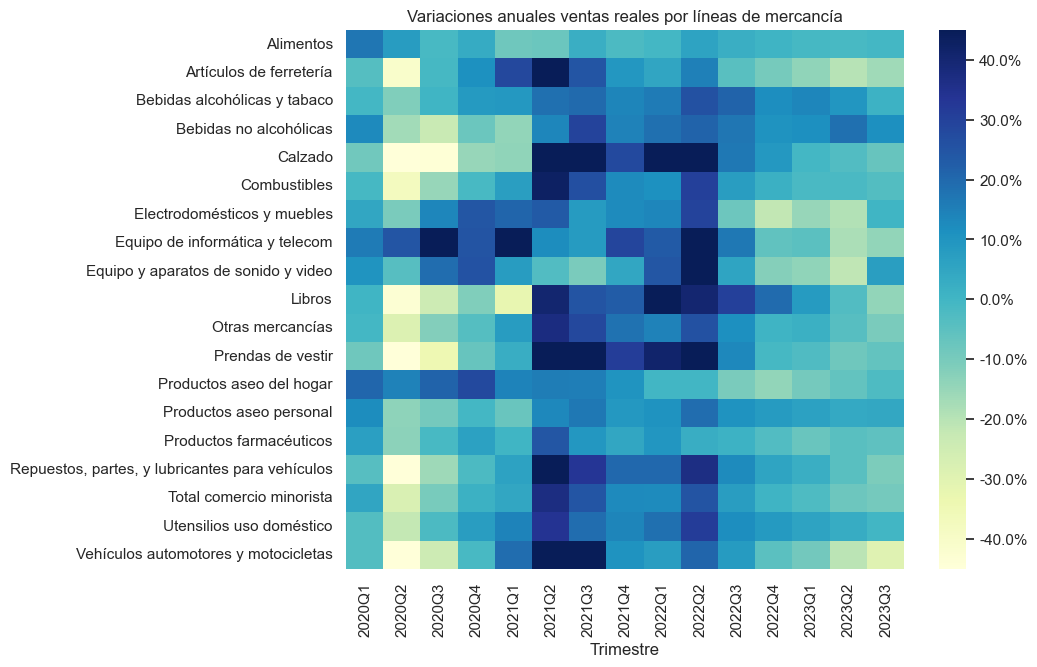

In [151]:
variaciones_anuales_t = variaciones_anuales.T

import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Establecer el rango deseado
vmin = -45  # Valor mínimo deseado
vmax = 45   # Valor máximo deseado

# Crear un mapa de calor con rango reducido
# Formatear los valores en la barra de colores como porcentajes
def percent_formatter(x, _):
    return f"{x:.1f}%"

# Establecer el tamaño de las celdas y de la figura
sns.set(rc={'figure.figsize':(9,7)})
sns.set(font_scale=1)  # Ajusta el tamaño de la fuente

heatmap = sns.heatmap(variaciones_anuales_t, cmap="YlGnBu", vmin=vmin, vmax=vmax, fmt=".1f", cbar_kws={'format': FuncFormatter(percent_formatter)})
plt.title("Variaciones anuales ventas reales por líneas de mercancía")
plt.savefig('heatmap_variaciones_anuales.png')

plt.show()

### Sin embargo, dado que la EMC proporcina 18 lineas de mercancia, se identifican las de mayor participación para el período 2022Q3 con el fin de acotar el analisís.

In [152]:
datos_2022Q3 = ventas_reales_trim.loc['2022Q3']

# Calcular la participación de cada linea de mercancia sobre el total de 'Total lineas'
participacion_2022Q3 = datos_2022Q3.div(datos_2022Q3['Total comercio minorista'], axis=0) * 100
participacion_2022Q3 = participacion_2022Q3.sort_values(ascending=False)
participacion_2022Q3

# Convertir 'participacion_2022Q3' a DataFrame y asignarle el nombre de columna 'participacion_2022Q3'
participacion_df = participacion_2022Q3.to_frame(name='participacion_2022Q3')

# Concatenar los dos DataFrames a lo largo de las columnas
ventas_reales_trim = pd.concat([variaciones_anuales_t, participacion_df], axis=1)

ventas_reales_trim

,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,participacion_2022Q3
Alimentos,17.034776,7.833573,-1.135711,3.206517,-8.417473,-7.606996,2.391535,-2.006988,-0.564522,5.666414,2.391139,0.668926,-0.717569,-1.184050,-0.443408,17.320947
Artículos de ferretería,-3.669643,-41.104618,-1.008263,11.035231,28.234816,88.750413,24.781227,9.252312,5.003675,14.866373,-4.271892,-9.550909,-13.861787,-19.953663,-16.332037,3.291218
Bebidas alcohólicas y tabaco,-0.605444,-11.342472,0.265369,8.574612,8.795806,18.354917,19.714209,14.040453,15.977413,25.757781,21.156634,11.751423,13.364039,9.578205,1.121994,2.094861
Bebidas no alcohólicas,12.729951,-16.589944,-23.188648,-7.426646,-14.326054,13.383402,29.775457,14.734025,18.543798,21.223099,17.114209,10.766118,11.463641,18.548635,11.551668,1.139223
Calzado,-8.605347,-76.463971,-44.028954,-15.036905,-13.955556,237.696797,87.212977,28.068345,57.908812,56.143420,16.603136,8.822548,-0.690065,-3.014099,-6.957304,1.697225
Combustibles,-1.029756,-37.509863,-15.043543,-1.267803,7.186157,42.577800,26.494924,12.486225,10.908038,30.490210,7.496105,2.042531,-1.416318,-1.691361,-3.254580,19.464601
Electrodomésticos y muebles,4.899589,-10.246064,13.674646,24.260110,20.885267,23.437591,8.138896,12.505916,13.439414,29.701399,-7.748617,-21.667425,-15.106673,-19.321801,0.157778,3.076318
Equipo de informática y telecom,15.860330,24.948245,47.423981,25.110046,51.479500,12.106223,8.269543,28.948091,23.261059,54.076887,16.537189,-5.698557,-4.664560,-18.207709,-14.084724,4.424984
Equipo y aparatos de sonido y video,10.307658,-4.156144,19.109733,25.507135,8.036869,-3.153228,-10.351166,4.583503,24.580126,51.652124,5.302710,-11.996969,-13.926602,-21.421992,7.112694,1.600450
Libros,0.082764,-43.020690,-23.919253,-11.264486,-32.297649,40.623029,25.191726,23.194671,45.752052,40.378730,30.443805,19.352432,8.352536,-2.919100,-14.357772,0.610235


### A continuación, se encuentra que las lineas de mercancia con mayor participacion en el total de ventas

In [47]:
# Obtener las 10 filas con mayor participación
top_10_participacion = participacion_df.nlargest(11, participacion_df.columns[0])

# Filtrar las filas en ventas_reales_trim usando las 10 líneas con mayor participación
ventas_reales_top_10 = ventas_reales_trim.loc[top_10_participacion.index]
ventas_reales_top_10

,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,participacion_2022Q3
Total comercio minorista,5.168462,-27.573531,-10.101173,1.679911,4.911611,36.958677,24.882704,12.797586,12.370670,25.038032,7.667787,0.491321,-2.250057,-8.070724,-9.169967,100.000000
Combustibles,-1.029756,-37.509863,-15.043543,-1.267803,7.186157,42.577800,26.494924,12.486225,10.908038,30.490210,7.496105,2.042531,-1.416318,-1.691361,-3.254580,19.464601
Alimentos,17.034776,7.833573,-1.135711,3.206517,-8.417473,-7.606996,2.391535,-2.006988,-0.564522,5.666414,2.391139,0.668926,-0.717569,-1.184050,-0.443408,17.320947
Vehículos automotores y motocicletas,-3.408516,-61.249932,-24.033391,-1.187096,19.159272,174.928655,56.298942,10.840836,7.614910,20.937965,8.424399,-4.728254,-8.964331,-20.572907,-29.208183,10.335651
"Repuestos, partes, y lubricantes para vehículos",-4.094974,-46.076365,-15.848700,-1.996275,6.292485,67.265453,33.109310,20.384640,20.382216,36.821148,12.408932,5.366608,2.382527,-4.420366,-10.589116,7.023608
Prendas de vestir,-8.104313,-68.890265,-34.423923,-6.851582,2.590265,175.316683,76.154706,31.065653,41.445073,59.115216,13.308385,-0.732097,-2.606832,-8.287895,-6.244163,4.857135
Equipo de informática y telecom,15.860330,24.948245,47.423981,25.110046,51.479500,12.106223,8.269543,28.948091,23.261059,54.076887,16.537189,-5.698557,-4.664560,-18.207709,-14.084724,4.424984
Productos aseo personal,12.272267,-13.708818,-9.256605,-0.659918,-7.033298,13.036068,16.701158,8.903624,10.746135,19.275566,10.557500,8.138118,6.508046,4.051950,4.450041,3.769031
Artículos de ferretería,-3.669643,-41.104618,-1.008263,11.035231,28.234816,88.750413,24.781227,9.252312,5.003675,14.866373,-4.271892,-9.550909,-13.861787,-19.953663,-16.332037,3.291218
Otras mercancías,-0.662965,-28.625819,-11.775168,-3.707064,8.079160,37.496168,28.243447,17.994319,14.451167,25.910114,11.570178,0.367312,1.762646,-4.116037,-10.386049,3.161988


In [48]:
top_10_participacion = top_10_participacion.drop('Total comercio minorista')
top_10_participacion

,participacion_2022Q3
Combustibles,19.464601
Alimentos,17.320947
Vehículos automotores y motocicletas,10.335651
"Repuestos, partes, y lubricantes para vehículos",7.023608
Prendas de vestir,4.857135
Equipo de informática y telecom,4.424984
Productos aseo personal,3.769031
Artículos de ferretería,3.291218
Otras mercancías,3.161988
Electrodomésticos y muebles,3.076318


Se grafica los resultados obtenidos en bar plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


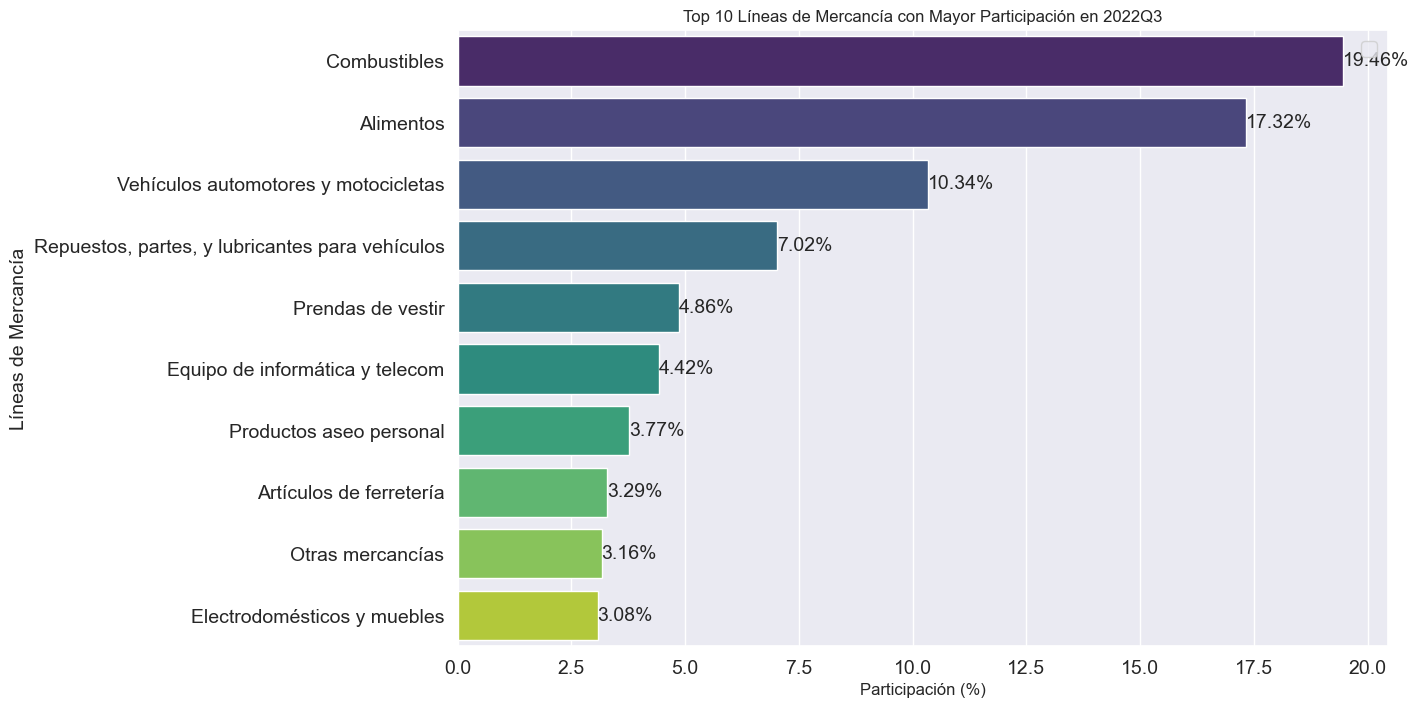

In [57]:
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='participacion_2022Q3', y=top_10_participacion.index, data=top_10_participacion, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Participación (%)', fontsize=12)
plt.ylabel('Líneas de Mercancía', fontsize=14)
plt.title('Top 10 Líneas de Mercancía con Mayor Participación en 2022Q3')

bar_plot.tick_params(axis='both', which='major', labelsize=14)

# Agregar los valores en las barras con un tamaño de fuente más grande
for index, value in enumerate(top_10_participacion['participacion_2022Q3']):
    bar_plot.text(value, index, f'{value:.2f}%', va='center', fontsize=14)

bar_plot.legend(fontsize=15)

# Mostrar el gráfico
plt.show()


#### Bajo esos resultados, se observa cómo a partir del segundo trimestre de 2020, todas las lineas de mercancia a excepción de alimentos, productos de aseo del hogar, equipo de informática presentan variaciones negativas.

#### Luego viene un periodo de reactivacion y crecimiento en el 2021 y 2022, con crecimientos superiores a 100%, destacandose el segundo trimestre de 2021 con los crecimientos mas altos dado el bajo nivel de compración de 2022Q2, pero durante todo el 2021 fue importante el crecimiento en las ventas de bienes como vehiculos, repuestos, prendas de vestir y electrodomesticos considerando que en el cuarto trimestre de 2021 y a lo largo de 2022 (marzo, junio, diciembre) se realizó la política del día sin iva que incentivó las ventas de estos bienes

#### En 2023 nos encontramos en un periodo de normalización del consumo de algunos bienes, porque mientras que en el 2021 los hogares destinaban su gasto a bienes durables y semidurables, en 2023 se reemplazó ese comportamiento hacia las experiencias por eso vemos ese crecimiento tan alto en terminos de conciertos 

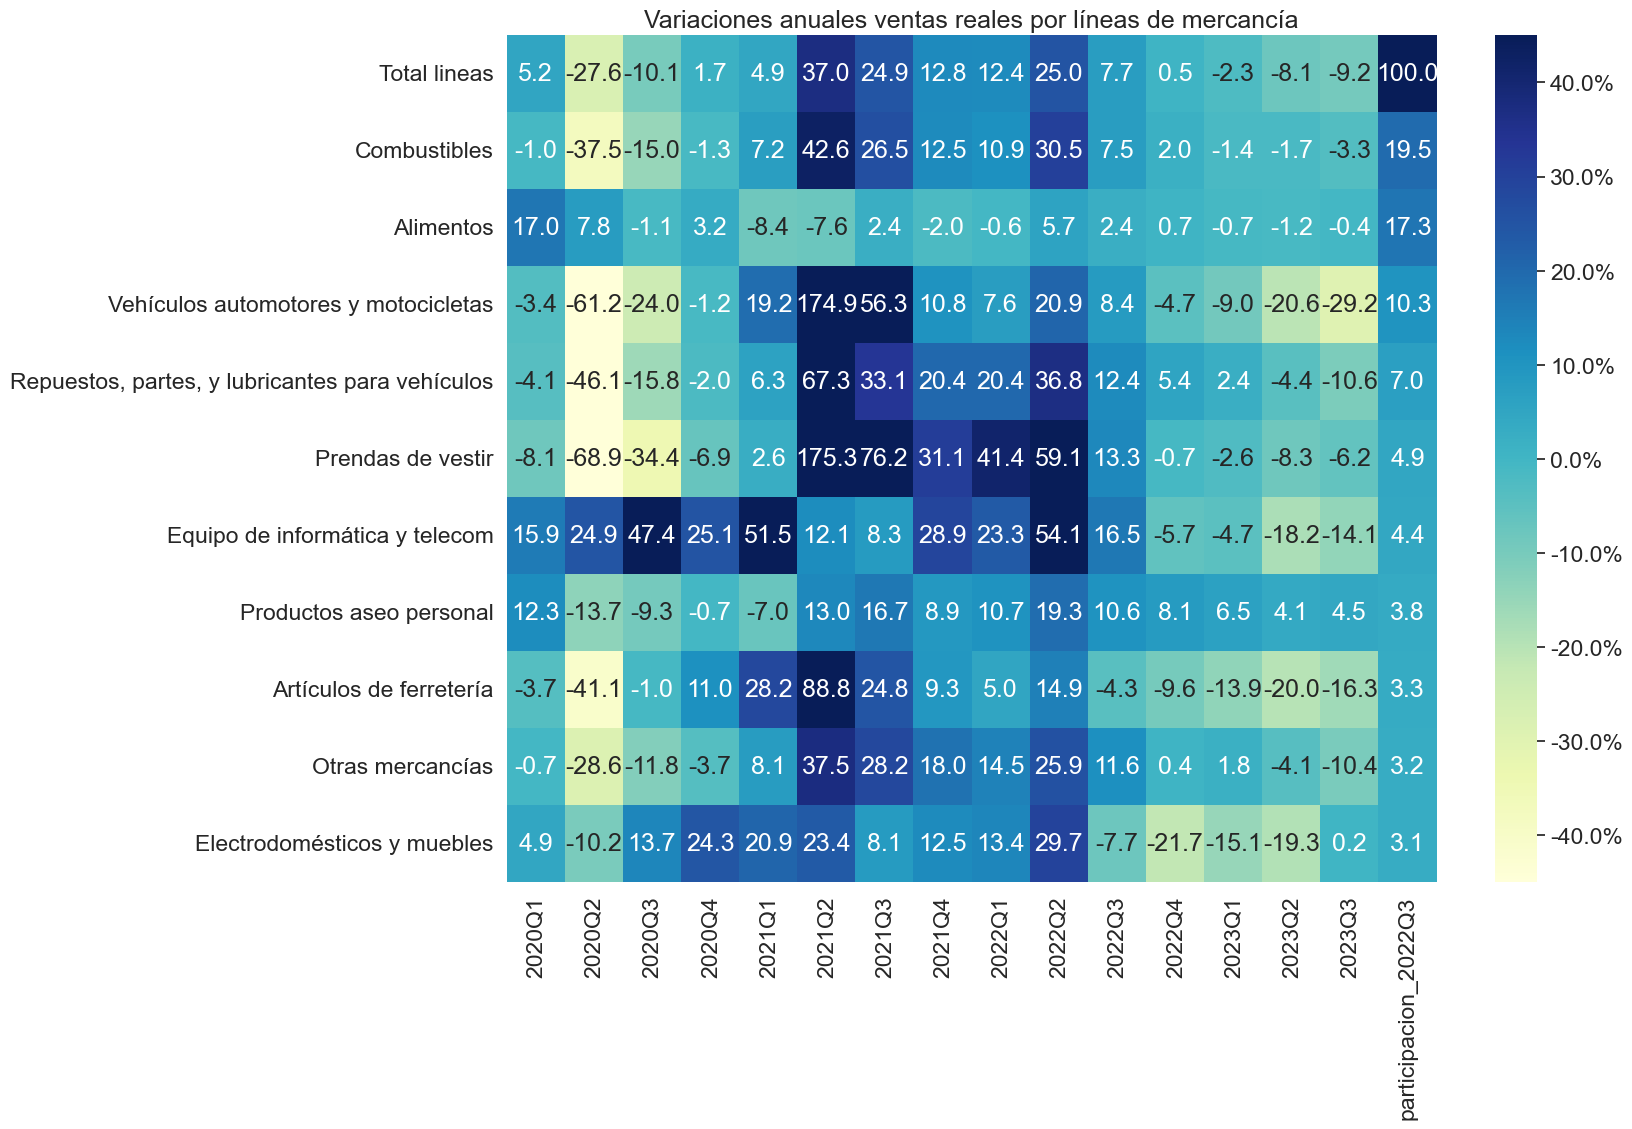

In [110]:
# Establecer el rango deseado
vmin = -45  # Valor mínimo deseado
vmax = 45   # Valor máximo deseado

# Crear un mapa de calor con rango reducido
# Formatear los valores en la barra de colores como porcentajes
def percent_formatter(x, _):
    return f"{x:.1f}%"

# Establecer el tamaño de las celdas y de la figura
sns.set(rc={'figure.figsize':(15,11)})
sns.set(font_scale=1.5)  # Ajusta el tamaño de la fuente

heatmap2 = sns.heatmap(ventas_reales_top_10, cmap="YlGnBu", vmin=vmin, vmax=vmax, annot=True, fmt=".1f", cbar_kws={'format': FuncFormatter(percent_formatter)})
plt.title("Variaciones anuales ventas reales por líneas de mercancía")
plt.savefig('heatmap_top_10_variaciones_anuales.png')

plt.show()

## Analisís regional 

In [246]:
## se calcula el total de ventas reales para los departamentos que mide la encuesta

# Se utiliza groupby para calcular las ventas totales por departamento y año
ventas_totales_depto = base_min.groupby([base_min['fecha'].dt.to_period("Y")]).agg({
    'Antioquia': 'sum',
    'Atlántico': 'sum',
    'Bogotá': 'sum',
    'Cundinamarca': 'sum',
    'Santander': 'sum',
    'Valle del Cauca': 'sum',
    'Otros departamentos': 'sum',
    'Total Nacional': 'sum'
}).reset_index()

# Cambiar el nombre de la columna 'fecha' por 'Año'
ventas_totales_depto = ventas_totales_depto.rename(columns={'fecha': 'Año'})

ventas_totales_depto

,Año,Antioquia,Atlántico,Bogotá,Cundinamarca,Santander,Valle del Cauca,Otros departamentos,Total Nacional
0,2019,18375059194,6112463350,39255299999,6609508680,4300605241,13454807649,32570644980,120678389046
1,2020,17681030906,5739565175,35810688563,7605702196,4094944556,12526713319,30171800535,113630445206
2,2021,21082184791,6769591723,42425028744,8882954424,4832700219,13901414201,35985280496,133879154621
3,2022,22749873502,7527499918,47409395860,10009591810,5396792843,15027107097,39212718533,147332979591
4,2023,15413306734,5092514071,31548368103,6440825456,3674966282,10077551215,26555177464,98802709293


In [70]:
ventas_totales_depto.to_excel('ventas_totales_depto.xlsx')

In [51]:
# Filtrar el dataframe solo para el año 2022
df_2022 = ventas_totales_depto[ventas_totales_depto['Año'] == "2022"]

# Seleccionar las columnas correspondientes a los departamentos y al total nacional
columnas_departamentos = ['Antioquia', 'Atlántico', 'Bogotá', 'Cundinamarca', 'Otros departamentos', 'Santander', 'Valle del Cauca']
columna_total_nacional = 'Total Nacional'

# Calcular la participación de cada departamento en el total nacional
participacion_2022 = df_2022[columnas_departamentos] / df_2022[columna_total_nacional].values[0] * 100
participacion_2022


,Antioquia,Atlántico,Bogotá,Cundinamarca,Otros departamentos,Santander,Valle del Cauca
3,15.441128,5.109175,32.1784,6.793857,26.615031,3.66299,10.199418


### Se observa que Bogotá tiene la mayor participacion en la EMC minorista, sefguido de Antioquia y Valle del Cauca, sin considerar el peso del grupo de "otros departamentos"

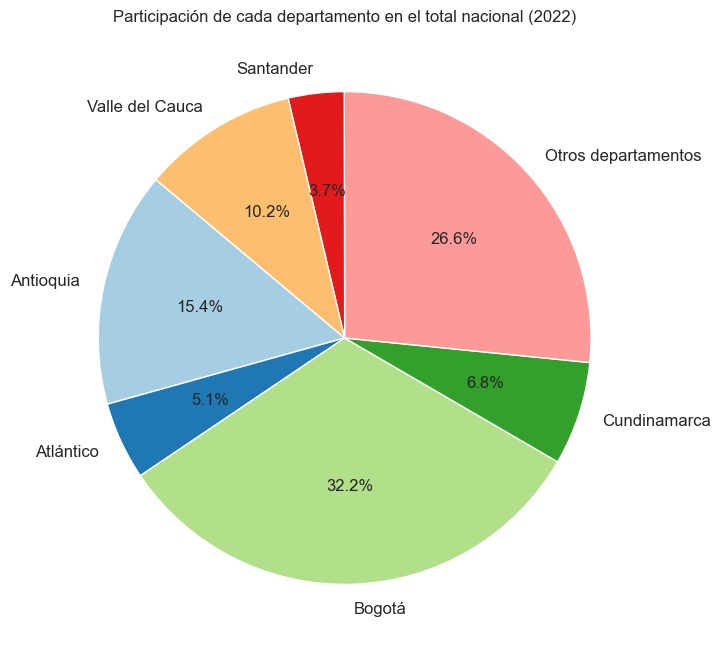

In [60]:
# gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(participacion_2022.iloc[0], labels=participacion_2022.columns, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, textprops={'fontsize': 12})

plt.title('Participación de cada departamento en el total nacional (2022)')


plt.show()



## Dado que la EMC está disponible hasta septiembre de 2023 a continuación se calculan las  ventas totales del año corrido a septiembre para cada periodo

In [251]:
base_min['Año'] = base_min['fecha'].dt.to_period("Y").astype(str)

# Filtrar los datos para incluir solo los meses de enero a septiembre en cada año
filtro_ene_sep = base_min['fecha'].dt.month <= 9
base_min_ene_sep = base_min[filtro_ene_sep]

# Utilizar groupby para calcular las ventas totales por departamento y año
ventas_totales_depto_sep = base_min_ene_sep.groupby(['Año']).agg({
    'Antioquia': 'sum',
    'Atlántico': 'sum',
    'Bogotá': 'sum',
    'Cundinamarca': 'sum',
    'Santander': 'sum',
    'Valle del Cauca': 'sum',
    'Otros departamentos': 'sum',
    'Total Nacional': 'sum'
}).reset_index()

# Mostrar el DataFrame resultante
ventas_totales_depto_sep 

,Año,Antioquia,Atlántico,Bogotá,Cundinamarca,Santander,Valle del Cauca,Otros departamentos,Total Nacional
0,2019,13060886695,4326899291,28011421603,4626919036,3019476662,9669011121,23159533014,85874147412
1,2020,12089543377,3931829611,24512941326,5157998306,2791388005,8678505430,20831412016,77993618058
2,2021,14822204140,4705249389,29617421016,6167939341,3367858173,9717418426,25248628368,93646718865
3,2022,16593558887,5441392861,34530143125,7253823363,3890391007,10920951119,28427555656,107057816023
4,2023,15413306734,5092514071,31548368103,6440825456,3674966282,10077551215,26555177464,98802709293


In [252]:
# Establecer la columna 'Año' como índice
ventas_totales_depto_sep.set_index('Año', inplace=True)

In [254]:
# Calcular el índice base 100 utilizando el año 2019 como referencia
ventas_totales_depto_sep = ventas_totales_depto_sep / ventas_totales_depto_sep.loc["2019"] * 100

ventas_totales_depto_sep=ventas_totales_depto_sep.drop('2019')
ventas_totales_depto_sep

,Antioquia,Atlántico,Bogotá,Cundinamarca,Santander,Valle del Cauca,Otros departamentos,Total Nacional
Año,,,,,,,,
2020,92.562960,90.869451,87.510522,111.478032,92.446086,89.755874,89.947461,90.823164
2021,113.485435,108.744139,105.733373,133.305539,111.537811,100.500644,109.020455,109.051119
2022,127.047721,125.757326,123.271655,156.774374,128.843222,112.947963,122.746670,124.668272
2023,118.011182,117.694306,112.626801,139.203332,121.708716,104.225252,114.661973,115.055243


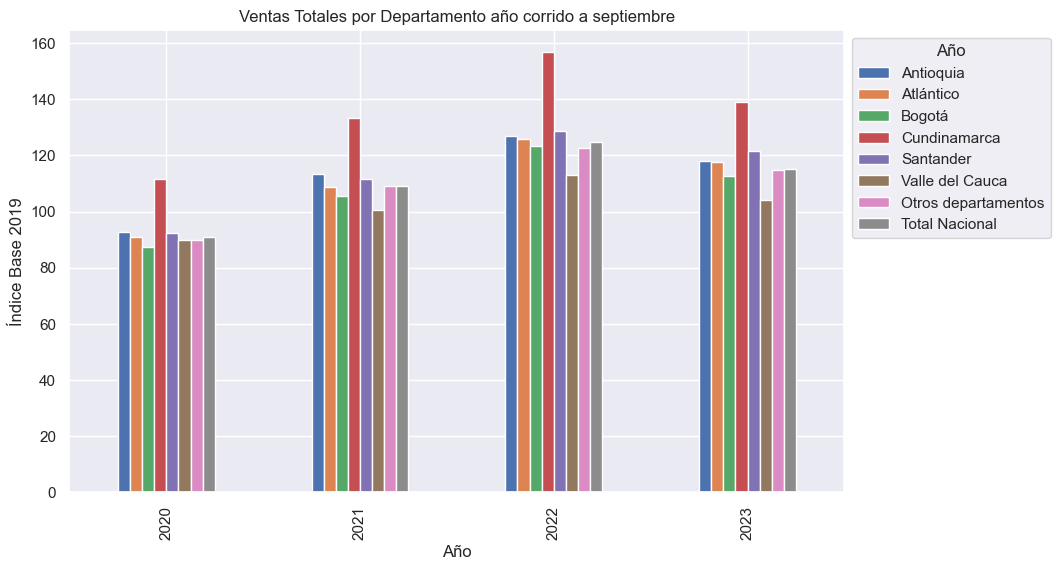

In [257]:
ventas_totales_depto_sep.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas Totales por Departamento año corrido a septiembre')
plt.xlabel('Año')
plt.ylabel('Índice Base 2019')
plt.legend(title='Año', bbox_to_anchor=(1, 1))  # Coloca la leyenda en la esquina superior derecha
plt.show()

# Asignacion de actividad comercial

### Con el fin de analizar el comportamiento de cada departamento se calculan las ventas por actividad comercial, en donde primero se asignan los nombres a cada CIIU (Clasificación Industrial Internacional Uniforme de todas las actividades  económicas) que comprende cada actividad comercial definida por la EMC, y a partir de ahí se extraen las ventas por actividad comercial para cada departamento 

In [71]:
#Se asigna un diccionario de mapeo a cada codigo ciiu que corresponde a una actividad comercial en la encuesta
mapeo_cod_act = {
    4511: 'Vehiculos',
    4530: 'Repuestos, partes, y lubricantes para vehículos',
    4541: 'Repuestos, partes, y lubricantes para vehículos',
    4711: 'Alimentos, bebidas, tabaco',
    4719: 'Alimentos, bebidas, tabaco',
    4721: 'Alimentos, bebidas, tabaco',
    4722: 'Alimentos, bebidas, tabaco',
    4723: 'Alimentos, bebidas, tabaco',
    4724: 'Alimentos, bebidas, tabaco',
    4729: 'Alimentos, bebidas, tabaco',
    4741: 'Equipo de informática y telecom; otros enseres domésticos',
    4742: 'Equipo de informática y telecom; otros enseres domésticos',
    4751: 'Equipo de informática y telecom; otros enseres domésticos',
    4752: 'Equipo de informática y telecom; otros enseres domésticos',
    4753: 'Equipo de informática y telecom; otros enseres domésticos',
    4754: 'Equipo de informática y telecom; otros enseres domésticos',
    4755: 'Equipo de informática y telecom; otros enseres domésticos',
    4759: 'Equipo de informática y telecom; otros enseres domésticos',
    4761: 'Articulos culturales y de entretenimiento',
    4762: 'Articulos culturales y de entretenimiento',
    4769: 'Articulos culturales y de entretenimiento',
    4774: 'Articulos culturales y de entretenimiento',
    4771: 'Prendas de Vestir y calzado',
    4772: 'Prendas de Vestir y calzado',
    4773: 'Productos farmacéuticos y cosméticos'}

# Crea una nueva columna 'Nombre_COD_ACT' utilizando el diccionario de mapeo
base_min['Nombre_COD_ACT'] = base_min['COD_ACT'].map(mapeo_cod_act)

# Muestra el DataFrame resultante
base_min[['COD_ACT', 'Nombre_COD_ACT']].tail(100)

,COD_ACT,Nombre_COD_ACT
104578,4711,"Alimentos, bebidas, tabaco"
104579,4711,"Alimentos, bebidas, tabaco"
104580,4711,"Alimentos, bebidas, tabaco"
104581,4711,"Alimentos, bebidas, tabaco"
104582,4711,"Alimentos, bebidas, tabaco"
...,...,...
104673,4530,"Repuestos, partes, y lubricantes para vehículos"
104674,4530,"Repuestos, partes, y lubricantes para vehículos"
104675,4530,"Repuestos, partes, y lubricantes para vehículos"
104676,4530,"Repuestos, partes, y lubricantes para vehículos"


In [154]:
## análisis por departamentos 
## se calcula el total de ventas reales para los departamentos que mide la encuesta

ventas_reales_depto_Q = pd.pivot_table(base_min, 
                                     values=['Antioquia',
                                             'Atlántico',
                                             'Bogotá',
                                             'Cundinamarca',
                                             'Santander',
                                             'Valle del Cauca',
                                             'Otros departamentos',
                                             'Total Nacional'],
                                     index=[base_min['fecha'].dt.to_period("Q"), 'Nombre_COD_ACT'],
                                     aggfunc="sum")

ventas_reales_depto_Q

Antioquia  \
fecha  Nombre_COD_ACT                                                   
2019Q1 Alimentos, bebidas, tabaco                          2166276290   
       Articulos culturales y de entretenimiento             61052321   
       Equipo de informática y telecom; otros enseres ...   489429454   
       Prendas de Vestir y calzado                          196934402   
       Productos farmacéuticos y cosméticos                 179777985   
...                                                               ...   
2023Q3 Equipo de informática y telecom; otros enseres ...   581625638   
       Prendas de Vestir y calzado                          358005167   
       Productos farmacéuticos y cosméticos                 240323994   
       Repuestos, partes, y lubricantes para vehículos      506242927   
       Vehiculos                                            752956333   

                                                           Atlántico  \
fecha  Nombre_COD_ACT                                                  
2019Q1 Alimentos, bebidas, tabaco                          758277237   
       Articulos culturales y de entretenimiento            54812934   
       Equipo de informática y telecom; otros enseres ...  153525219   
       Prendas de Vestir y calzado                          66375103   
       Productos farmacéuticos y cosméticos                 77007629   
...                                                              ...   
2023Q3 Equipo de informática y telecom; otros enseres ...  178166192   
       Prendas de Vestir y calzado                         111703902   
       Productos farmacéuticos y cosméticos                105943939   
       Repuestos, partes, y lubricantes para vehículos     123719713   
       Vehiculos                                           168140251   

                                                               Bogotá  \
fecha  Nombre_COD_ACT                                                   
2019Q1 Alimentos, bebidas, tabaco                          3507763237   
       Articulos culturales y de entretenimiento            180222699   
       Equipo de informática y telecom; otros enseres ...   616482857   
       Prendas de Vestir y calzado                          565866795   
       Productos farmacéuticos y cosméticos                 233286190   
...                                                               ...   
2023Q3 Equipo de informática y telecom; otros enseres ...   810468340   
       Prendas de Vestir y calzado                          621023885   
       Productos farmacéuticos y cosméticos                 274846005   
       Repuestos, partes, y lubricantes para vehículos      533889178   
       Vehiculos                                           3817650524   

                                                           Cundinamarca  \
fecha  Nombre_COD_ACT                                                     
2019Q1 Alimentos, bebidas, tabaco                             802630683   
       Articulos culturales y de entretenimiento                7794778   
       Equipo de informática y telecom; otros enseres ...     137239483   
       Prendas de Vestir y calzado                             51217547   
       Productos farmacéuticos y cosméticos                    40807209   
...                                                                 ...   
2023Q3 Equipo de informática y telecom; otros enseres ...     183966015   
       Prendas de Vestir y calzado                            167611149   
       Productos farmacéuticos y cosméticos                    56799145   
       Repuestos, partes, y lubricantes para vehículos        177484108   
       Vehiculos                                              431506645   

                                                           Otros departamentos  \
fecha  Nombre_COD_ACT                                                            
2019Q1 Alimentos, bebidas, tabaco                                   4103351529   
 

In [503]:
#ventas_reales_depto_Q.to_excel('ventas_reales_depto_Q.xlsx', index=True)

In [73]:
# Selecciona los valores de 2019
ventas_reales_depto_Q=ventas_reales_depto_Q.unstack()

### Dado que las ventas reales están expresadas en miles de millones de pesos, se convierten en indice base 2019 para una mejor comparación

In [74]:
# Seleccionar el rango de trimestres para el año 2019 y calcular el promedio
promedio_2019 = ventas_reales_depto_Q.loc['2019Q1':'2019Q4'].mean()

#promedio_2019
# Dividir cada valor por el promedio del 2019 y multiplicar por 100
depto_base_2019_Q = ventas_reales_depto_Q.div(promedio_2019) * 100
depto_base_2019_Q = depto_base_2019_Q.stack()
depto_base_2019_Q

Antioquia  \
fecha  Nombre_COD_ACT                                                   
2019Q1 Alimentos, bebidas, tabaco                           92.224309   
       Articulos culturales y de entretenimiento            95.635775   
       Equipo de informática y telecom; otros enseres ...   92.357494   
       Prendas de Vestir y calzado                          69.485661   
       Productos farmacéuticos y cosméticos                 94.162647   
...                                                               ...   
2023Q3 Equipo de informática y telecom; otros enseres ...  109.755320   
       Prendas de Vestir y calzado                         126.317319   
       Productos farmacéuticos y cosméticos                125.874942   
       Repuestos, partes, y lubricantes para vehículos     121.579110   
       Vehiculos                                            99.028110   

                                                            Atlántico  \
fecha  Nombre_COD_ACT                                                   
2019Q1 Alimentos, bebidas, tabaco                           92.105280   
       Articulos culturales y de entretenimiento           116.918093   
       Equipo de informática y telecom; otros enseres ...   90.813518   
       Prendas de Vestir y calzado                          68.464172   
       Productos farmacéuticos y cosméticos                 94.541959   
...                                                               ...   
2023Q3 Equipo de informática y telecom; otros enseres ...  105.389192   
       Prendas de Vestir y calzado                         115.219635   
       Productos farmacéuticos y cosméticos                130.066952   
       Repuestos, partes, y lubricantes para vehículos     123.449739   
       Vehiculos                                            79.957943   

                                                               Bogotá  \
fecha  Nombre_COD_ACT                                                   
2019Q1 Alimentos, bebidas, tabaco                           91.550730   
       Articulos culturales y de entretenimiento            89.531589   
       Equipo de informática y telecom; otros enseres ...   90.685184   
       Prendas de Vestir y calzado                          80.436541   
       Productos farmacéuticos y cosméticos                 96.093886   
...                                                               ...   
2023Q3 Equipo de informática y telecom; otros enseres ...  119.220624   
       Prendas de Vestir y calzado                          88.276983   
       Productos farmacéuticos y cosméticos                113.212962   
       Repuestos, partes, y lubricantes para vehículos      97.818108   
       Vehiculos                                           105.776527   

                                                           Cundinamarca  \
fecha  Nombre_COD_ACT                                                     
2019Q1 Alimentos, bebidas, tabaco                             88.854779   
       Articulos culturales y de entretenimiento              92.002552   
       Equipo de informática y telecom; otros enseres ...     92.540141   
       Prendas de Vestir y calzado                            65.650685   
       Productos farmacéuticos y cosméticos                   96.502349   
...                                                                 ...   
2023Q3 Equipo de informática y telecom; otros enseres ...    124.047691   
       Prendas de Vestir y calzado                           214.844080   
       Productos farmacéuticos y cosméticos                  134.320652   
       Repuestos, partes, y lubricantes para vehículos       189.592831   
       Vehiculos                                             114.040182   

                                                           Otros departamentos  \
fecha  Nombre_COD_ACT                                                            
2019Q1 Alimentos, bebidas, tabaco                                    9

In [75]:
# Filtrar solo los datos de Bogotá
Bogota = depto_base_2019_Q["Bogotá"]
Bogota = Bogota.reset_index()


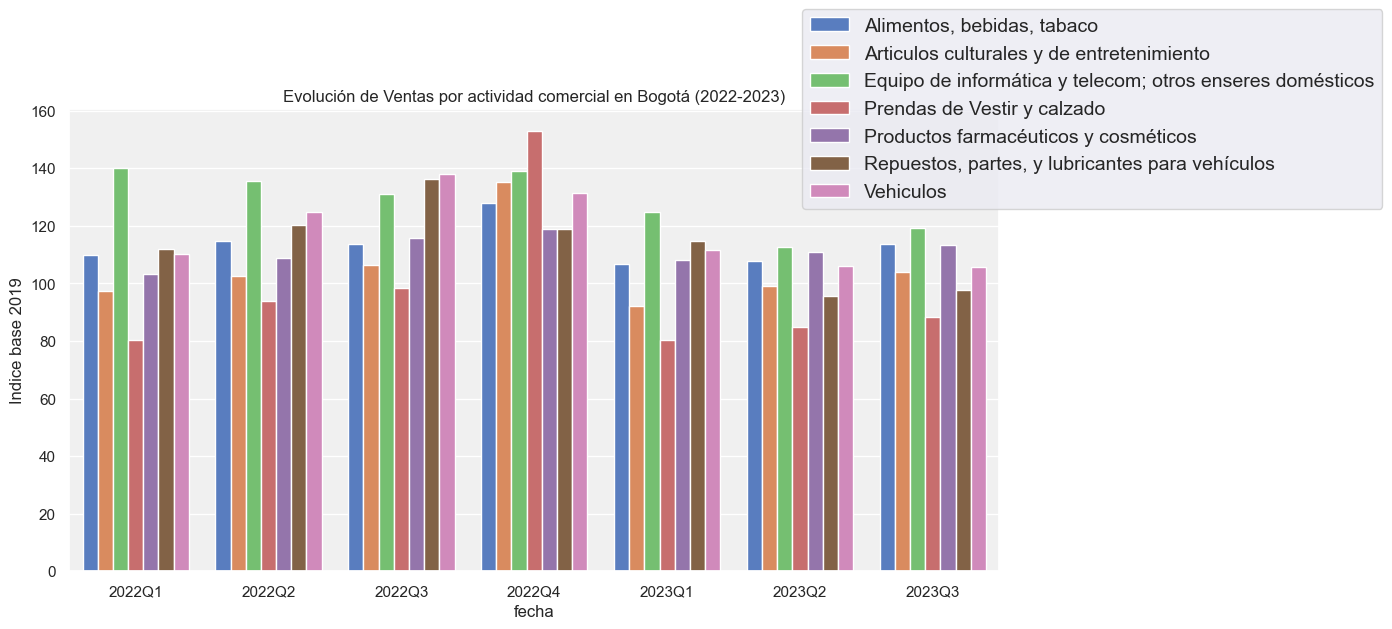

In [113]:
# Filtrar datos para Bogotá y los años 2021, 2022 y 2023
ventas_bog_2021_2023 = Bogota[Bogota['fecha'].dt.year.isin([2022, 2023])]
ventas_bog_2021_2023.reset_index(inplace=True)  # Resetear el índice para evitar problemas

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='fecha', y='Bogotá', hue='Nombre_COD_ACT', data=ventas_bog_2021_2023,
                 errorbar=None, edgecolor='white', palette='muted')

# Agregar fondo gris
ax.set_facecolor('#f0f0f0')

plt.ylabel('Indice base 2019')
plt.title('Evolución de Ventas por actividad comercial en Bogotá (2022-2023)')
plt.legend(loc='center', bbox_to_anchor=(1.1, 1.0), ncol=1, fontsize = 14)

plt.show()


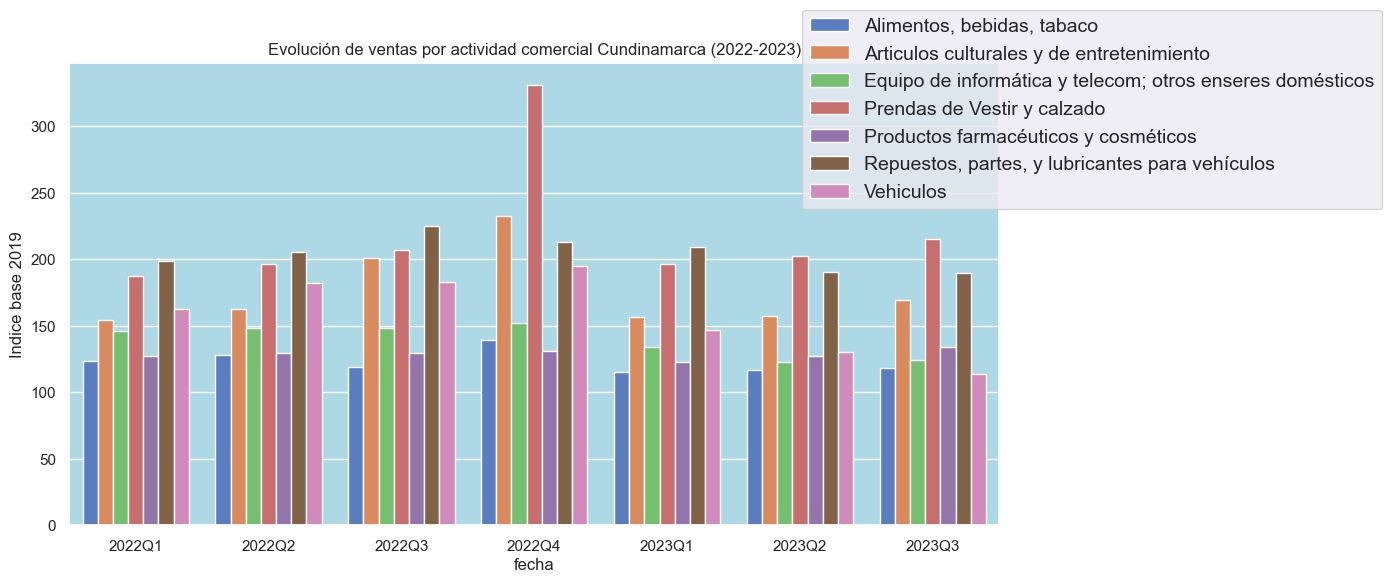

In [112]:
# Filtrar solo los datos de Bogotá
Cundinamarca = depto_base_2019_Q["Cundinamarca"]
Cundinamarca = Cundinamarca.reset_index()

ventas_bog_2021_2023 = Cundinamarca[Cundinamarca['fecha'].dt.year.isin([2022, 2023])]
ventas_bog_2021_2023.reset_index(inplace=True)  # Resetear el índice para evitar problemas

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='fecha', y='Cundinamarca', hue='Nombre_COD_ACT', data=ventas_bog_2021_2023,
                 errorbar=None, edgecolor='white', palette='muted')

# Agregar fondo gris
ax.set_facecolor('#ADD8E6')

plt.ylabel('Indice base 2019')
plt.title('Evolución de ventas por actividad comercial Cundinamarca (2022-2023)')
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.9), ncol=1, fontsize = 14)

plt.show()


### Para cundinamarca se observa indices altos en prendas de vestir, repuestos y articulos culturales, cuando revisamos por empresa podemos ver que esto se debe a que allí se ubican empresas como

In [111]:
# Extraer las columnas "Cundinamarca" y "Nombre_COD_ACT" del DataFrame base_min
df_cund = base_min[["fecha", "Cundinamarca", "Nombre_COD_ACT", "NOMBRE_COMERCIAL"]]

# Filtrar las filas correspondientes a las categorías específicas
categorias_interes = ["Articulos culturales y de entretenimiento", "Repuestos, partes, y lubricantes para vehículos", "Prendas de Vestir y calzado"]
df_filtrado_cun = df_cund[df_subset["Nombre_COD_ACT"].isin(categorias_interes)]
df_filtrado_cun

# Agrupar por trimestre, 'Nombre_COD_ACT' y 'NOMBRE_COMERCIAL', sumando las ventas de 'Cundinamarca'
df_agrupado_cun = df_filtrado_cun.groupby([df_filtrado_cun['fecha'].dt.to_period("y"), 'Nombre_COD_ACT', 'NOMBRE_COMERCIAL']).agg({
    'Cundinamarca': 'sum'
}).reset_index()

# Obtener las empresas que más vendieron para cada tipo de producto y trimestre
top_empresas_cun = df_agrupado_cun.groupby([df_agrupado_cun['fecha'], 'Nombre_COD_ACT']).apply(lambda x: x.nlargest(1, 'Cundinamarca')).reset_index(drop=True)

top_empresas_cun


,fecha,Nombre_COD_ACT,NOMBRE_COMERCIAL,Cundinamarca
0,2019,Articulos culturales y de entretenimiento,"PEPE GANGA,BABY GANGA",15527413
1,2019,Prendas de Vestir y calzado,ADIDAS COLOMBIA LTDA,51940831
2,2019,"Repuestos, partes, y lubricantes para vehículos",CUMMINS DE LOS ANDES S.A,73039527
3,2020,Articulos culturales y de entretenimiento,DECATHLON,16333959
4,2020,Prendas de Vestir y calzado,ADIDAS COLOMBIA LTDA,237881620
5,2020,"Repuestos, partes, y lubricantes para vehículos",CUMMINS DE LOS ANDES S.A,66857053
6,2021,Articulos culturales y de entretenimiento,DECATHLON,29411314
7,2021,Prendas de Vestir y calzado,ADIDAS COLOMBIA LTDA,313959928
8,2021,"Repuestos, partes, y lubricantes para vehículos",OMNIPARTS S.A.S.,89251345
9,2022,Articulos culturales y de entretenimiento,DECATHLON,31533339


## El mismo ejercicio se podría hacer para Bogotá observando que:

In [261]:
# Extraer las columnas "Cundinamarca" y "Nombre_COD_ACT" del DataFrame base_min
df_bog = base_min[["fecha", "Bogotá", "Nombre_COD_ACT", "NOMBRE_COMERCIAL"]]

# Filtrar las filas correspondientes a las categorías específicas
categorias_interes = ["Equipo de informática y telecom; otros enseres domésticos", "Vehiculos", "Articulos culturales y de entretenimiento"]
df_filtrado_bog = df_bog[df_bog["Nombre_COD_ACT"].isin(categorias_interes)]
df_filtrado_bog

# Agrupar por trimestre, 'Nombre_COD_ACT' y 'NOMBRE_COMERCIAL', sumando las ventas de 'Cundinamarca'
df_agrupado = df_filtrado_bog.groupby([df_filtrado_bog['fecha'].dt.to_period("Y"), 'Nombre_COD_ACT', 'NOMBRE_COMERCIAL']).agg({
    'Bogotá': 'sum'
}).reset_index()

# Obtener las empresas que más vendieron para cada tipo de producto y trimestre
top_empresas_bog = df_filtrado_bog.groupby([df_filtrado_bog['fecha'], 'Nombre_COD_ACT']).apply(lambda x: x.nlargest(1, 'Bogotá')).reset_index(drop=True)

top_empresas_bog

,fecha,Bogotá,Nombre_COD_ACT,NOMBRE_COMERCIAL
0,2019-01-01,7373206,Articulos culturales y de entretenimiento,DECATHLON
1,2019-01-01,84958738,Equipo de informática y telecom; otros enseres...,SODIMAC HOMECENTER CORONA
2,2019-01-01,116527620,Vehiculos,AUTOMOTORES TOYOTA COLOMBIA S A S
3,2019-02-01,6971785,Articulos culturales y de entretenimiento,"PEPE GANGA,BABY GANGA"
4,2019-02-01,76601410,Equipo de informática y telecom; otros enseres...,SODIMAC HOMECENTER CORONA
...,...,...,...,...
166,2023-08-01,112930162,Equipo de informática y telecom; otros enseres...,SODIMAC HOMECENTER CORONA
167,2023-08-01,219858523,Vehiculos,AUTOMOTORES TOYOTA COLOMBIA S A S
168,2023-09-01,9103094,Articulos culturales y de entretenimiento,"PEPE GANGA,BABY GANGA"
169,2023-09-01,89410420,Equipo de informática y telecom; otros enseres...,SODIMAC HOMECENTER CORONA


## Análisis de empleo

### Se calcula el total de empleo por actividad economica y trimestre 

In [203]:
empleo_min = base_min.groupby(['Trimestre', 'Nombre_COD_ACT', 'PPERMAN']).sum()
empleo_min

C:\Users\nicol\AppData\Local\Temp\ipykernel_24732\2683795901.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  empleo_min = base_min.groupby(['Trimestre', 'Nombre_COD_ACT', 'PPERMAN']).sum()


NORDEN  COD_ACT  CORRELA  \
Trimestre Nombre_COD_ACT             PPERMAN                               
2019Q1    Alimentos, bebidas, tabaco 0        57892269   836421   834039   
                                     1         2538267    56718    56556   
                                     2         2068299    70851    70689   
                                     3         6766281    56673    56532   
                                     4         6109260    61477    61243   
...                                                ...      ...      ...   
2023Q3    Vehiculos                  994        231426     4511     4511   
                                     1004       231426     4511     4511   
                                     1365       235750     4511     4511   
                                     1370       235750     4511     4511   
                                     1386       235750     4511     4511   

                                              ESTAB_MES_ANT  APERTURA  \
Trimestre Nombre_COD_ACT             PPERMAN                            
2019Q1    Alimentos, bebidas, tabaco 0                613.0      10.0   
                                     1                 59.0       1.0   
                                     2                 18.0       0.0   
                                     3                 60.0       0.0   
                                     4                 24.0       0.0   
...                                                     ...       ...   
2023Q3    Vehiculos                  994               74.0       0.0   
                                     1004              74.0       0.0   
                                     1365              32.0       0.0   
                                     1370              32.0       0.0   
                                     1386              32.0       0.0   

                                              CIERRE_DEF  TOT_ESTAB  \
Trimestre Nombre_COD_ACT             PPERMAN                          
2019Q1    Alimentos, bebidas, tabaco 0               2.0        621   
                                     1               1.0         59   
                                     2               0.0         18   
                                     3               0.0         60   
                                     4               1.0         23   
...                                                  ...        ...   
2023Q3    Vehiculos                  994             0.0         74   
                                     1004            0.0         74   
                                     1365            0.0         32   
                                     1370            0.0         32   
                                     1386            0.0         32   

                                              ALIMENTOS_SIN_BEB  \
Trimestre Nombre_COD_ACT             PPERMAN                      
2019Q1    Alimentos, bebidas, tabaco 0                255004452   
                                     1                 32157851   
                                     2                  6946572   
                                     3                 20620250   
                                     4                 14418205   
...                                                         ...   
2023Q3    Vehiculos                  994                      0   
                                     1004                     0   
                                     1365                     0   
                                     1370                     0   
                                     1386                     0   

                                              ALIMENTOS_SIN_BEB_MAY  \
Trimestre Nombre_COD_ACT             PPERMAN                          
2019Q1    Alimentos, bebidas, tabaco 0                     16952970   
                                     1                       429214   
                             

## Se calcula el personal ocupado por cada departamento y por trimestre

In [234]:
empleo_depto = base_min.groupby([base_min['fecha'].dt.to_period("q")]).agg({
    'PERSONAL_ANT_E_AJ': 'sum',
    'PERSONAL_ATL_E_AJ': 'sum',
    'PERSONAL_BOG_DPTO_E_AJ': 'sum',
    'PERSONAL_CUN_E_AJ': 'sum',
    'PERSONAL_SANT_E_AJ': 'sum',
    'PERSONAL_VALLE_E_AJ': 'sum',
    'PERSONAL_OTROS_E_AJ': 'sum',
    'PERSONAL_DEPTOS_E_AJ': 'sum',
    'Total_personal_E':'sum'
}).reset_index()


empleo_depto

,fecha,PERSONAL_ANT_E_AJ,PERSONAL_ATL_E_AJ,PERSONAL_BOG_DPTO_E_AJ,PERSONAL_CUN_E_AJ,PERSONAL_SANT_E_AJ,PERSONAL_VALLE_E_AJ,PERSONAL_OTROS_E_AJ,PERSONAL_DEPTOS_E_AJ,Total_personal_E
0,2019Q1,164499,60269,264667,47384,40050,129457,286260,992585,974975
1,2019Q2,164765,60601,264441,47518,40807,127919,285854,991901,978019
2,2019Q3,166761,62065,267391,47360,41422,128845,289855,1003693,987630
3,2019Q4,172147,65288,277025,50581,43152,133814,303950,1045948,1018207
4,2020Q1,167036,64315,270000,49114,41726,129137,294962,1016292,999067
5,2020Q2,160034,60584,256219,47688,39384,122285,278073,964263,956327
6,2020Q3,156297,59880,248864,48759,38898,120965,270540,944204,933298
7,2020Q4,162312,62091,254202,51850,40849,125031,281892,978224,955992
8,2021Q1,158814,61732,246971,49883,40247,120605,277117,955369,945031
9,2021Q2,158960,61299,245280,49414,40257,118362,277982,951547,943400


## Se grafican los departamentos con mayor nivel de empleo, observando que lideran Bogotá, Antioquia y Valle del Cauca, sin considerar la categoria de otros departamentos

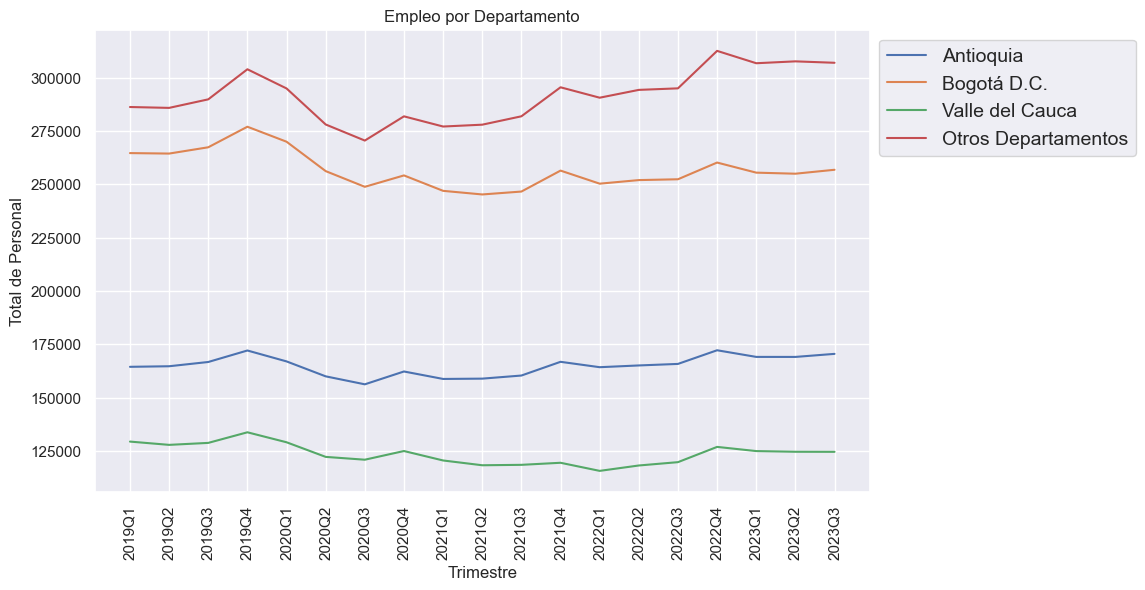

In [239]:
empleo_depto['fecha'] = empleo_depto['fecha'].astype(str)

plt.figure(figsize=(10, 6))

# Crear líneas para cada columna en el dataframe
plt.plot(empleo_depto['fecha'], empleo_depto['PERSONAL_ANT_E_AJ'], label='Antioquia')
#plt.plot(empleo_depto['fecha'], empleo_depto['PERSONAL_ATL_E_AJ'], label='Atlántico')
plt.plot(empleo_depto['fecha'], empleo_depto['PERSONAL_BOG_DPTO_E_AJ'], label='Bogotá D.C.')
#plt.plot(empleo_depto['fecha'], empleo_depto['PERSONAL_CUN_E_AJ'], label='Cundinamarca')
#plt.plot(empleo_depto['fecha'], empleo_depto['PERSONAL_SANT_E_AJ'], label='Santander')
plt.plot(empleo_depto['fecha'], empleo_depto['PERSONAL_VALLE_E_AJ'], label='Valle del Cauca')
plt.plot(empleo_depto['fecha'], empleo_depto['PERSONAL_OTROS_E_AJ'], label='Otros Departamentos')
#plt.plot(empleo_depto['fecha'], empleo_depto['PERSONAL_DEPTOS_E_AJ'], label='Total Departamentos')
#plt.plot(empleo_depto['fecha'], empleo_depto['Total_personal_E'], label='Total Personal')

plt.title('Empleo por Departamento')
plt.xlabel('Trimestre')
plt.ylabel('Total de Personal')

plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', fontsize = 14)

plt.xticks(rotation=90)


plt.show()

## Finalmente se grafican los departamentos con menor generación de empleo, destacandose Cundinamrca y Santander

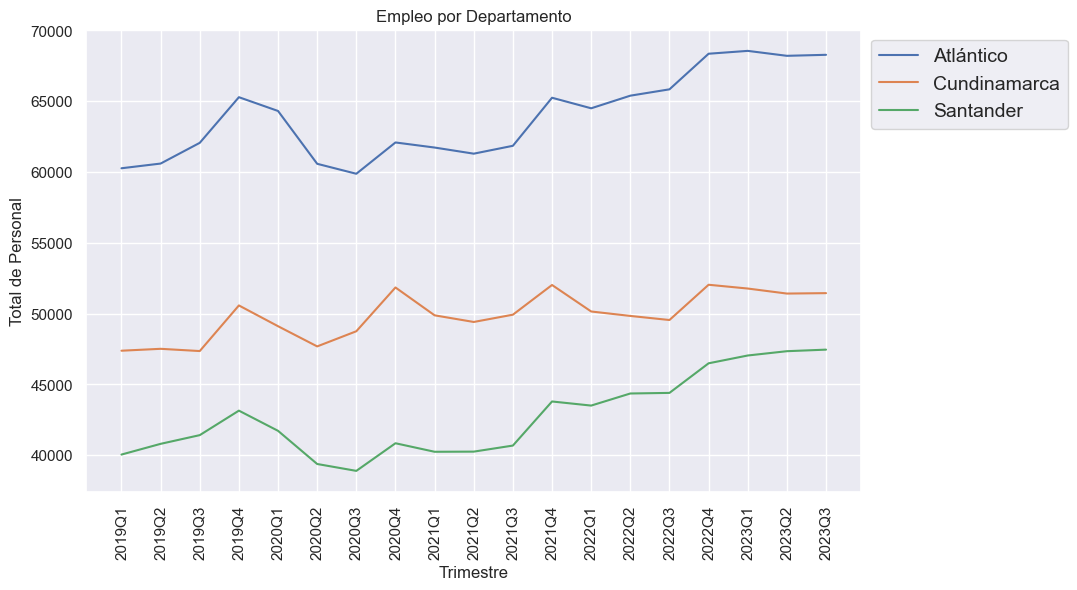

In [240]:
empleo_depto['fecha'] = empleo_depto['fecha'].astype(str)

plt.figure(figsize=(10, 6))

# Crear líneas para cada columna en el dataframe
plt.plot(empleo_depto['fecha'], empleo_depto['PERSONAL_ATL_E_AJ'], label='Atlántico')
plt.plot(empleo_depto['fecha'], empleo_depto['PERSONAL_CUN_E_AJ'], label='Cundinamarca')
plt.plot(empleo_depto['fecha'], empleo_depto['PERSONAL_SANT_E_AJ'], label='Santander')


plt.title('Empleo por Departamento')
plt.xlabel('Trimestre')
plt.ylabel('Total de Personal')

plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', fontsize= 14)
plt.xticks(rotation=90)

plt.show()